# The SOM class
This tutorial will help you understand the core of **HySOM**, the `HSOM` class. You will learn the fundamental methods for training and exploring a trained SOM.
To demonstrate its functionality, we will use a sample dataset included with **HySOM**.


In [12]:
import numpy as np
from hysom import HSOM 
from hysom.utils.datasets import get_sample_data
import matplotlib.pyplot as plt

data = get_sample_data()

## Training a SOM

Creating a new SOM instance requires three mandatory arguments to define the lattice dimensions (currently, only rectangular shapes are supported) and the input data dimensions:
- `width: int` — The number of units along the width of the map.
- `height: int` — The number of units along the height of the map.
- `input_dim: (int, int)` — The dimensions of the input data the SOM will be trained on. Currently, only 2D sequences are supported, meaning the `input_dim`  should follow the format: `(sequence_length,2)` 
  
Additionally, you can specify an optional random_seed to ensure reproducibility:
- `random_seed: int` 


In [13]:
mysom = HSOM(width=5, height=5, input_dim = (100,2), random_seed=1234567)

Once instantiated, the `train` method can be called with two mandatory arguments: `data`, which represents the training data, and `epochs`, which defines the number of training iterations. Each data sample is fed to the map once per epoch.
Additionally, several optional arguments provide full control over the training process, including `distance_function` (which defaults to Dynamic Time Warping), `neighborhood_function` (which defaults to Gaussian), `[initial/final]_learning_rate`, and more.
For further details, refer to the API Documentation and advanced tutorials. In this tutorial, we will only include `track_errors` to record the history of the quantization and topographic errors during training and `verbose` to get reports of the training process in the console


In [14]:
epochs = 5
mysom.train(data= data, epochs = epochs, track_errors=True, verbose = 4)


Epoch: 1/5 - Quant. Error: 0.91 - Topo. Error: 0.65
[85/340] 25%
[170/340] 50%
[255/340] 75%
[340/340] 100%
Epoch: 2/5 - Quant. Error: 1.43 - Topo. Error: 0.0
[85/340] 25%
[170/340] 50%
[255/340] 75%
[340/340] 100%
Epoch: 3/5 - Quant. Error: 1.25 - Topo. Error: 0.0
[85/340] 25%
[170/340] 50%
[255/340] 75%
[340/340] 100%
Epoch: 4/5 - Quant. Error: 1.02 - Topo. Error: 0.0
[85/340] 25%
[170/340] 50%
[255/340] 75%
[340/340] 100%
Epoch: 5/5 - Quant. Error: 0.91 - Topo. Error: 0.0
[85/340] 25%
[170/340] 50%
[255/340] 75%
[340/340] 100%
Training Completed! - Quant. Error: 0.87 - Topo. Error: 0.0


The trained `prototypes` (also called *codebooks* or *weight vectors*) can be extracted using: `get_prototypes()`

In [15]:
trained_prototypes = mysom.get_prototypes()
print(f"Trained prototypes have shape: {trained_prototypes.shape}")
print("First prototype:")
print(trained_prototypes[0,0])

Trained prototypes have shape: (5, 5, 100, 2)
First prototype:
[[0.0243587  0.04318654]
 [0.02725802 0.05484051]
 [0.03314153 0.08130733]
 [0.04055098 0.11156319]
 [0.04828624 0.13910039]
 [0.05638454 0.16467027]
 [0.06441792 0.19347673]
 [0.0716928  0.22357058]
 [0.07820642 0.253324  ]
 [0.08595951 0.28358356]
 [0.09401912 0.3158049 ]
 [0.10242837 0.33898644]
 [0.11170623 0.35621874]
 [0.12235884 0.37599595]
 [0.13412426 0.40539655]
 [0.1447083  0.4370404 ]
 [0.15300295 0.47458163]
 [0.16303296 0.50751515]
 [0.17232501 0.54189768]
 [0.18115122 0.57717821]
 [0.19090329 0.61278295]
 [0.20059569 0.64631286]
 [0.211408   0.67679755]
 [0.2213009  0.69921496]
 [0.23141442 0.71916614]
 [0.24303003 0.73911635]
 [0.25427948 0.76091997]
 [0.26815996 0.78152127]
 [0.28256379 0.80022107]
 [0.29722429 0.81505383]
 [0.31047575 0.82082331]
 [0.32477859 0.82480905]
 [0.33789814 0.82357332]
 [0.34965729 0.81821456]
 [0.3615509  0.81064788]
 [0.37439299 0.79978834]
 [0.3857211  0.78512125]
 [0.39623141

## Inspecting Quantization and Topographic Errors 

While the final quantization and topographic errors are displayed in the console, the full history can be accessed using `get_QE_history` and `get_TE_history`:

In [16]:
qe_iter_index, qe = mysom.get_QE_history()
te_iter_index, te  = mysom.get_TE_history()

Let's plot them!

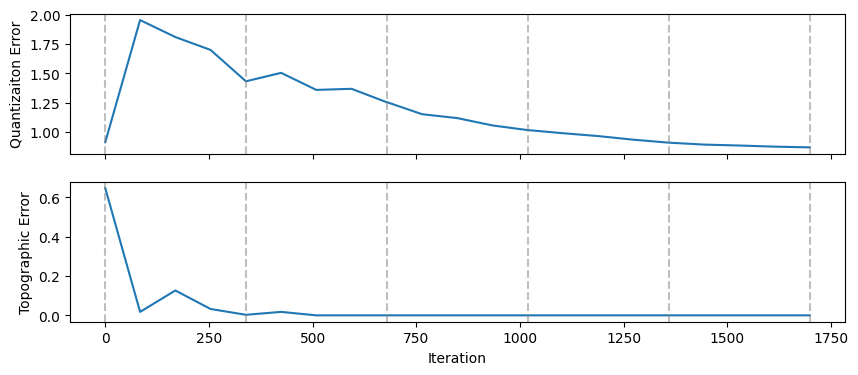

In [17]:
fig, (ax_qe, ax_te) = plt.subplots(2,1, figsize = (10,4), sharex=True)

# Plot topographic and quantization errors
ax_qe.plot(qe_iter_index, qe)
ax_te.plot(te_iter_index, te)
ax_qe.set_ylabel("Quantizaiton Error")
ax_te.set_xlabel("Iteration")
ax_te.set_ylabel("Topographic Error")

# Mark epochs
iterations_per_epoch = len(data)
idx = 0
for i in range(epochs+1):
    ax_qe.axvline(idx, color = "grey", linestyle  = "--", alpha = 0.5)
    ax_te.axvline(idx, color = "grey", linestyle  = "--", alpha = 0.5)
    idx += iterations_per_epoch

Note that TE and QE are not computed after each iteration, as doing so would be computationally expensive. You can control how often errors are computed using the `errors_sampling_rate` argument of the `train` method. By default, this value is set to `4`, meaning errors are computed four times per epoch, plus an initial computation at the very beginning.


In [18]:
qe_iter_index[:5]

(0, 84, 169, 254, 339)

The QE and TE histories are useful to diagnose the training process, but if you need this errors for other datasets using the final trained SOM, you can use the `quantization_error` and `topographic_error` methods (we'll use the same training data but other datasets, not used during training, can be used as well). These methods return the TE and QE for each sample in teh provided dataset

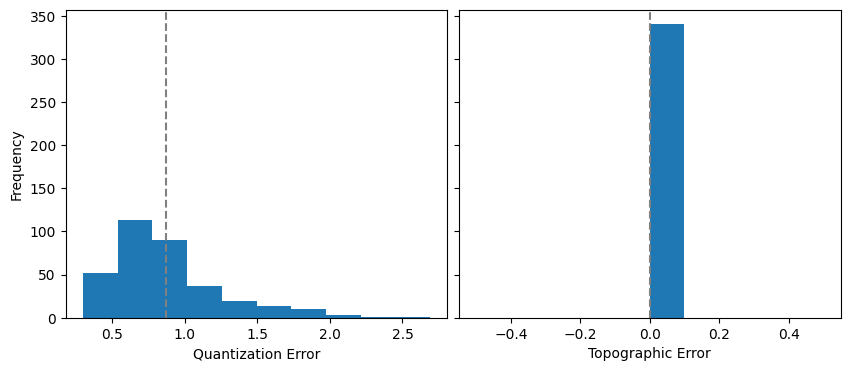

In [19]:
QE_final = mysom.quantization_error(data)
TE_final = mysom.topographic_error(data)

fig, (axqe, axte) = plt.subplots(1,2, sharey=True, figsize = (10,4))
axqe.hist(QE_final)
axte.hist(TE_final)
axqe.axvline(np.mean(QE_final), linestyle= "--", color = "grey")
axte.axvline(np.mean(TE_final), linestyle= "--", color = "grey")
axqe.set_ylabel("Frequency")
axqe.set_xlabel("Quantization Error")
axte.set_xlabel("Topographic Error")
plt.subplots_adjust(wspace=0.03)

## Classifying new samples 

With a trined SOM, you can classify samples using the `get_BMU`. 

In [20]:
sample_idx = np.random.randint(0, len(data))
sample = data[sample_idx]
BMU = mysom.get_BMU(sample)
print(BMU)

(2, 3)


`get_BMU` returns the coordinates of the Best Matching Unit following matrix notation `(row, col)`. The associated prototype can be obtained using: `get_prototypes()[BMU]` 

In [21]:
matching_prototype = mysom.get_prototypes()[BMU]

Let's plot the sample and matching prototypes as trajectory plots

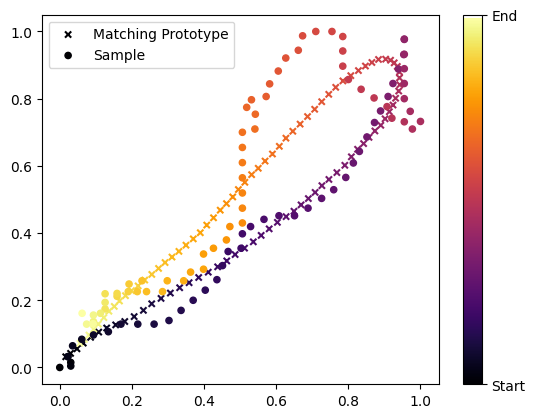

In [22]:
plt.figure()
plt.scatter(matching_prototype[:,0], matching_prototype[:,1], c = range(len(sample)), cmap = "inferno", s = 20, marker = "x", label = "Matching Prototype")
sc = plt.scatter(sample[:,0], sample[:,1], c = range(len(sample)), cmap = "inferno", s = 20, label = "Sample")

cb = plt.colorbar(sc)
cb.ax.set_yticks(ticks = [0, len(sample)], labels = ["Start", "End"])
plt.legend()